In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
df = pd.read_excel('data/imiona.xlsx')
df

,Rok,Imie,Liczba,Plec
0,2000,JAKUB,14497,M
1,2000,MATEUSZ,11454,M
2,2000,KACPER,8898,M
3,2000,MICHAŁ,8498,M
4,2000,PATRYK,7743,M
...,...,...,...,...
16412,2017,TINA,5,K
16413,2017,VANESA,5,K
16414,2017,VERONIKA,5,K
16415,2017,WIERA,5,K


### Zadanie 1

##### Korzystając ze zbioru danych imiona z poprzednich zajęć wykonaj wykres zliczający (Seaborn countplot z przykładu w notebooku) liczbę narodzonych dzieci w latach 2010 - 2015 z podziałem na płeć.

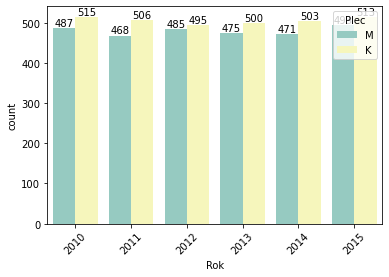

In [90]:
narodzenia = df[df['Rok'] >= 2010]
narodzenia = narodzenia[narodzenia['Rok'] <= 2015]
plt.xticks(rotation=45)
ax = sns.countplot(x='Rok', hue=narodzenia['Plec'], data=narodzenia, palette='Set3')

for container in ax.containers:
    ax.bar_label(container)

### Zadanie 2

##### Wyświetl najczęściej nadawane imię męskie oraz żeńskie w zbiorze imiona.

In [92]:
df[['Plec', 'Imie']].value_counts().reset_index().groupby('Plec')[[0, 'Imie']].max()

,0,Imie
Plec,,
K,18,ŻANETA
M,18,ŁUKASZ


### Zadanie 3

##### Wyświetl w konsoli liczbę unikalnych imion rozpoczynających się od litery K.

In [103]:
df[df['Imie'].str[0] == 'K']['Imie'].nunique()

98